# 시각화 (Visualization)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
import warnings

warnings.filterwarnings(action='ignore')
#  warnings.filterwarnings(action='default')

In [4]:
data = pd.read_csv("Busan_Covid-19.csv")

data

,date,day,total_coronic,new_coronic,total_be_cured,new_be_cured,deceased,total_negative,new_negative,diagnosed,isolated,total_released,new_released
0,2021-02-06,토,2879,11,2445,36,96,313750,2900,2911,5281,96416,433
1,2021-02-05,금,2868,15,2409,23,96,310850,1886,1901,5275,95983,413
2,2021-02-04,목,2853,34,2386,20,96,308964,2664,2698,5289,95570,324
3,2021-02-03,수,2819,24,2366,27,95,306300,1528,1552,5273,95246,493
4,2021-02-02,화,2795,21,2339,38,94,304772,1904,1925,5269,94753,410
...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,2020-02-25,화,51,13,0,0,0,1823,324,337,618,22,0
348,2020-02-24,월,38,22,0,0,0,1499,407,429,263,22,7
349,2020-02-23,일,16,11,0,0,0,1092,0,11,145,15,0
350,2020-02-22,토,5,3,0,0,0,1092,479,482,115,15,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            352 non-null    object
 1   day             352 non-null    object
 2   total_coronic   352 non-null    int64 
 3   new_coronic     352 non-null    int64 
 4   total_be_cured  352 non-null    int64 
 5   new_be_cured    352 non-null    int64 
 6   deceased        352 non-null    int64 
 7   total_negative  352 non-null    int64 
 8   new_negative    352 non-null    int64 
 9   diagnosed       352 non-null    int64 
 10  isolated        352 non-null    int64 
 11  total_released  352 non-null    int64 
 12  new_released    352 non-null    int64 
dtypes: int64(11), object(2)
memory usage: 35.9+ KB


In [6]:
data.shape

(352, 13)

In [7]:
data.columns

Index(['date', 'day', 'total_coronic', 'new_coronic', 'total_be_cured',
       'new_be_cured', 'deceased', 'total_negative', 'new_negative',
       'diagnosed', 'isolated', 'total_released', 'new_released'],
      dtype='object')

In [8]:
sns.set(style = 'whitegrid', context = 'notebook')
col = ['total_coronic', 'new_coronic', 'total_be_cured',
       'new_be_cured', 'deceased', 'total_negative', 'new_negative',
       'diagnosed', 'isolated', 'total_released', 'new_released']

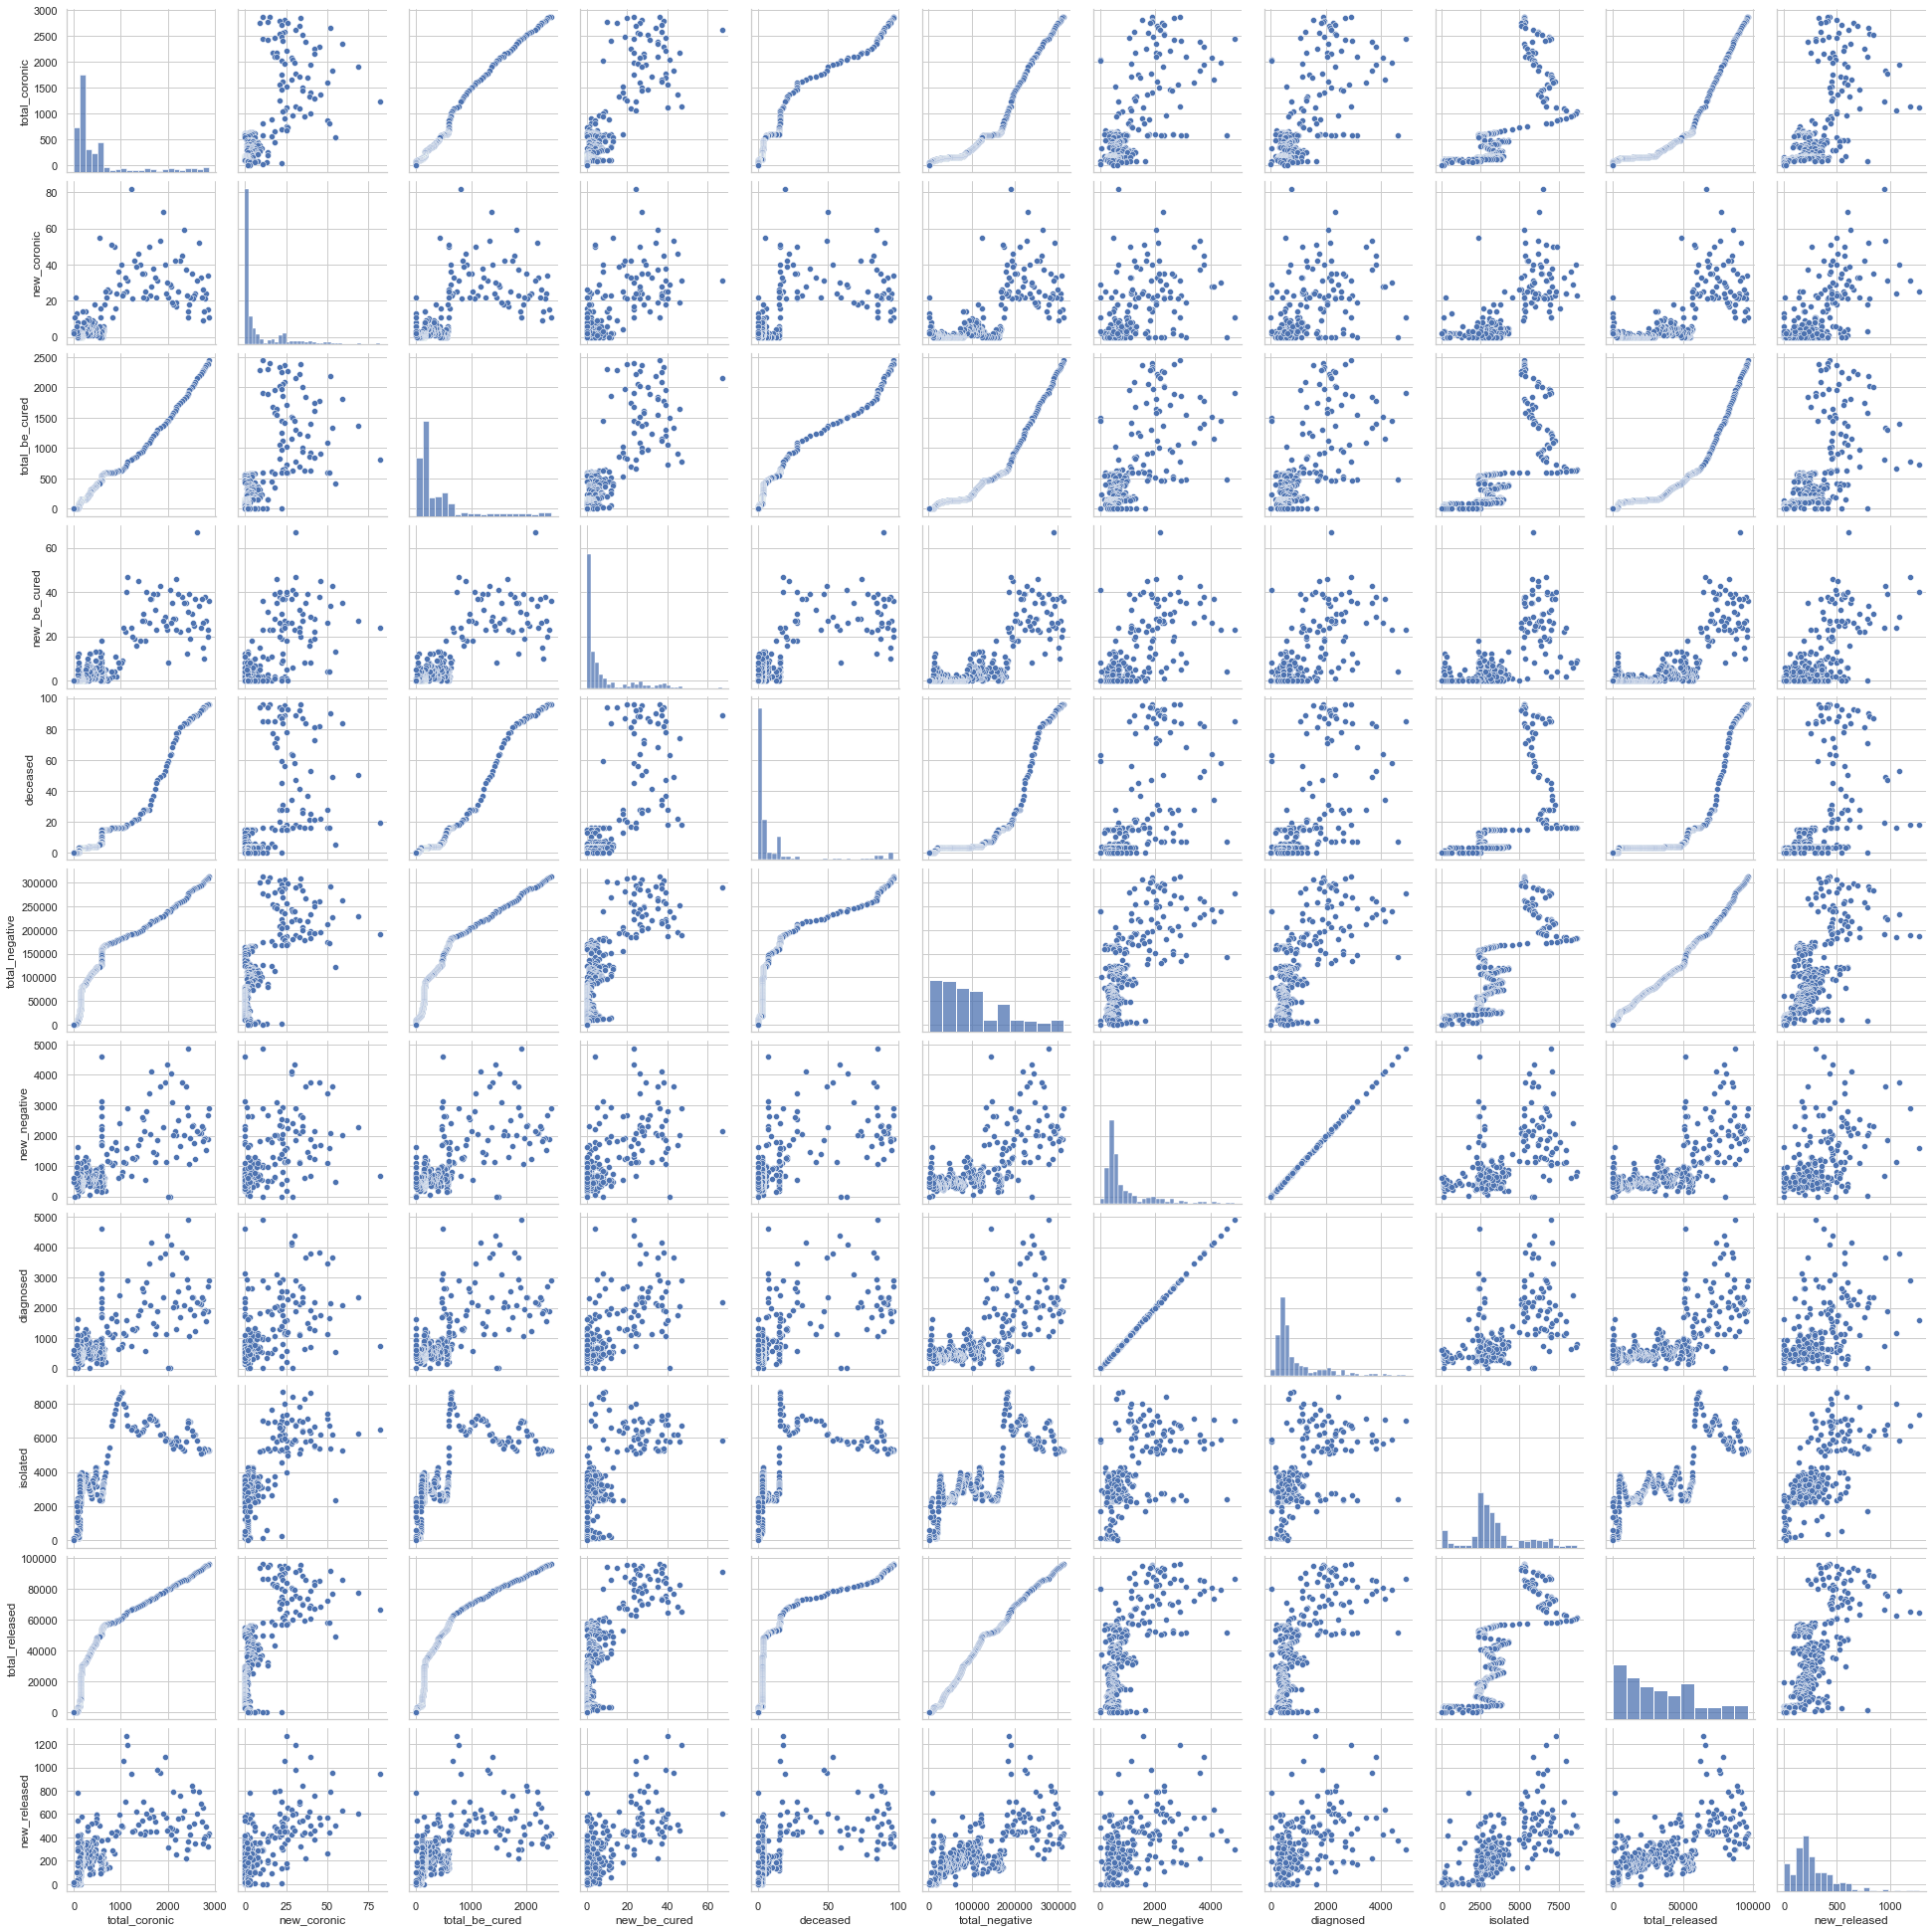

In [9]:
sns.pairplot(data[col], size = 2.5)
plt.show()
sns.reset_orig()

In [10]:
corr = data[col].corr()

In [11]:
# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

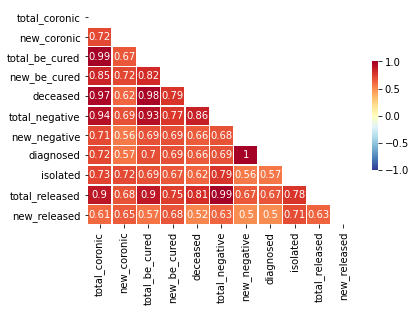

In [12]:
# 히트맵을 그린다
sns.heatmap(corr, 
            cmap = 'RdYlBu_r', 
            annot = True,            # 실제 값을 표시한다
            mask=mask,               # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,           # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5}, # 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1       # 컬러바 범위 -1 ~ 1
           )  
plt.show()

모든 변수들이 강한 양의 상관관계를 가짐을 알 수 있다.

### 시간에 따른 확진자 수 파악

In [43]:
y_pos = np.arange(len(data['date']))
y_pos = np.flip(y_pos)

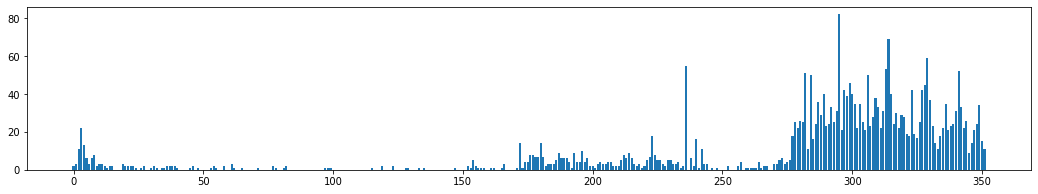

In [14]:
plt.figure(figsize=(18,3))
plt.bar(y_pos, data['new_coronic'])
plt.show()

In [15]:
data.iloc[350-270,0]

'2020-11-18'

In [16]:
data.loc[data['new_coronic'].idxmax()]

date              2020-12-12
day                        토
total_coronic           1227
new_coronic               82
total_be_cured           802
new_be_cured              24
deceased                  19
total_negative        190429
new_negative             662
diagnosed                744
isolated                6485
total_released         66556
new_released             947
Name: 56, dtype: object

약 2020년 11월 부터 코로나 확진자 판정을 받은 사람의 수가 대폭 증가함을 알 수 있다.  
또한 2020년 12월 12일에 총 82명의 인원이 추가 확진자로 판정받아 가장 높은 값을 가짐을 그래프상에서 알 수 있다.

In [17]:
# %matplotlib auto

plt.figure(figsize=(18,3))
plt.bar(y_pos, data['new_coronic'])
plt.xticks(y_pos, data['date'], rotation=90, size = 6)
plt.show()

### 시간에 따른 완치자 수 파악

In [18]:
y_pos = np.arange(len(data['date']))
y_pos = np.flip(y_pos)

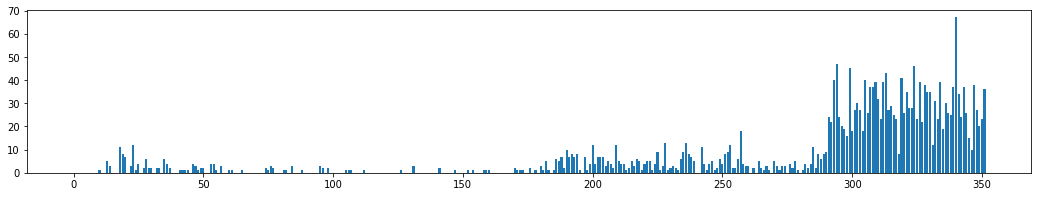

In [19]:
plt.figure(figsize=(18,3))
plt.bar(y_pos, data['new_be_cured'])
plt.show()

In [20]:
data.iloc[350-290,0]

'2020-12-08'

In [21]:
data.loc[data['new_be_cured'].idxmax()]

date              2021-01-26
day                        화
total_coronic           2618
new_coronic               31
total_be_cured          2155
new_be_cured              67
deceased                  89
total_negative        290399
new_negative            2163
diagnosed               2194
isolated                5840
total_released         90927
new_released             606
Name: 11, dtype: object

약 2020년 12월 부터 코로나 완치 판정을 받은 사람의 수가 대폭 증가함을 알 수 있다.
또한 2021년 01월 26일에 총 67명의 인원이 코로나 완치를 판정받아 가장 높은 값을 가짐을 그래프상에서 알 수 있다.

In [22]:
import datetime

In [23]:
data.date = pd.to_datetime(data.date)

In [24]:
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month

In [25]:
data.shape

(352, 15)

In [26]:
mydata0 = data.iloc[:,0]

In [27]:
mydata1 = data.iloc[:, 1:13]

In [28]:
mydata2 = data.iloc[:,13:15]

In [29]:
mydata2['month'] = mydata2['month'].apply(lambda x: "{:0>2d}".format(x))

In [30]:
mydata2 = mydata2.astype(str)

In [31]:
mydata2['year_month'] = mydata2[['year','month']].apply(lambda x: '-'.join(x), axis=1)

In [32]:
mydata2

,year,month,year_month
0,2021,02,2021-02
1,2021,02,2021-02
2,2021,02,2021-02
3,2021,02,2021-02
4,2021,02,2021-02
...,...,...,...
347,2020,02,2020-02
348,2020,02,2020-02
349,2020,02,2020-02
350,2020,02,2020-02


In [33]:
mydata2.groupby('year_month').count()

,year,month
year_month,,
2020-02,9,9
2020-03,31,31
2020-04,30,30
2020-05,31,31
2020-06,30,30
2020-07,31,31
2020-08,31,31
2020-09,30,30
2020-10,31,31


In [34]:
data = pd.concat([mydata0, mydata2, mydata1], axis=1)

In [35]:
data.dtypes

date              datetime64[ns]
year                      object
month                     object
year_month                object
day                       object
total_coronic              int64
new_coronic                int64
total_be_cured             int64
new_be_cured               int64
deceased                   int64
total_negative             int64
new_negative               int64
diagnosed                  int64
isolated                   int64
total_released             int64
new_released               int64
dtype: object

In [36]:
mean_data = data.groupby('year_month').mean()

In [39]:
mean_data.index

Index(['2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07',
       '2020-08', '2020-09', '2020-10', '2020-11', '2020-12', '2021-01',
       '2021-02'],
      dtype='object', name='year_month')

In [51]:
y_pos = np.arange(len(mean_data.index))

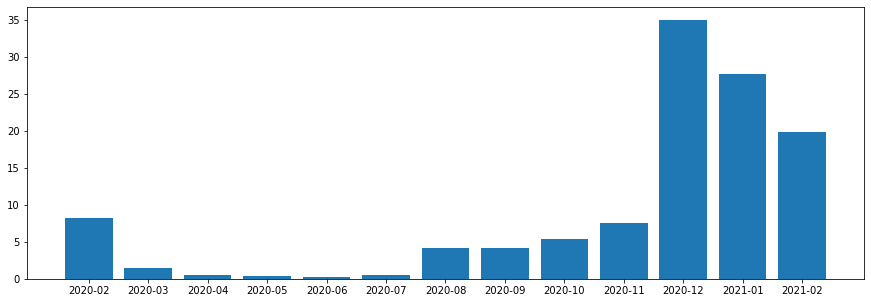

In [52]:
plt.figure(figsize=(15,5))
plt.bar(y_pos, mean_data['new_coronic'])
plt.xticks(y_pos, mean_data.index)
plt.show()

In [55]:
barWidth = 0.25

bar1 = mean_data['new_coronic']
bar2 = mean_data['new_be_cured']

r1 = np.arange(len(bar1))
r2 = [x + barWidth for x in r1]

print(r1)
print(r2)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12]
[0.25, 1.25, 2.25, 3.25, 4.25, 5.25, 6.25, 7.25, 8.25, 9.25, 10.25, 11.25, 12.25]


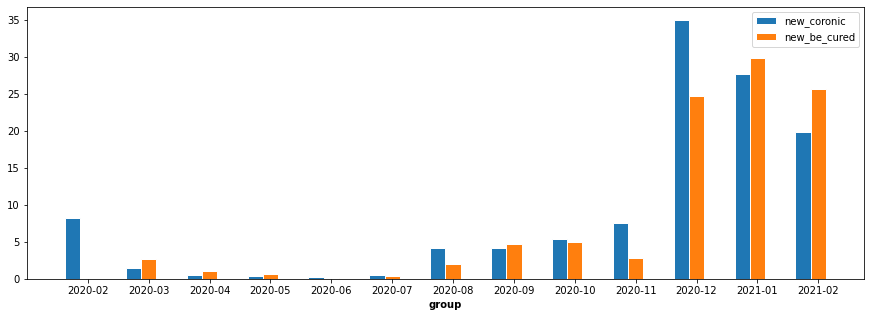

In [59]:
plt.figure(figsize=(15,5))

plt.bar(r1, bar1, width=barWidth, edgecolor='white', label='new_coronic')
plt.bar(r2, bar2, width=barWidth, edgecolor='white', label='new_be_cured')
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bar1))], mean_data.index)

plt.legend()
plt.show()